# Module 10: Unsupervised Learning
## Case Study – 1


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load the Dataset
data = pd.read_csv('driver-data.csv')

# Step 2: Explore the Dataset
print("Dataset Info:")
print(data.info())
print("\nMissing Values Check:")
print(data.isnull().sum())

# Display the first few rows of the data
print("\nFirst 5 Rows of the Dataset:")
print(data.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB
None

Missing Values Check:
id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

First 5 Rows of the Dataset:
           id  mean_dist_day  mean_over_speed_perc
0  3423311935          71.24                    28
1  3423313212          52.53                    25
2  3423313724          64.54                    27
3  3423311373          55.69                    22
4  3423310999          54.58                    25


In [12]:
# Step 3: Preprocess the Data
# Drop the 'id' column as it is not useful for clustering
features = data.drop(columns=['id'])

# Standardize the data to bring all features to the same scale
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

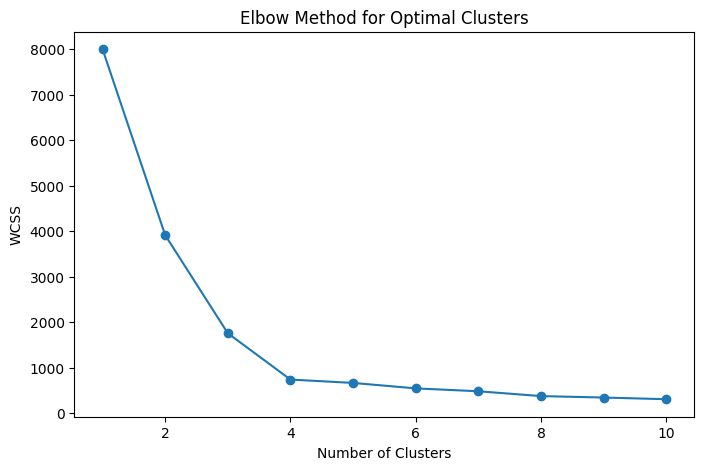

[7999.999999999998, 3911.926390428418, 1756.553615947244, 739.1534508645577, 664.9838071983531, 545.2591033936885, 481.77268602452307, 375.77515026823113, 344.20890925559615, 306.97337203496477]


In [14]:
# Step 4: Determine the Optimal Number of Clusters
# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

print(wcss)

In [15]:
# Step 5: Apply K-Means Clustering
# Based on the elbow plot, let's assume optimal clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

In [17]:
# Step 6: Analyze the Clusters
# Display the number of drivers in each cluster
cluster_counts = data['Cluster'].value_counts()
print("\nNumber of Drivers in Each Cluster:")
print(cluster_counts)

# Calculate the mean of each feature for each cluster
cluster_features = data.groupby('Cluster').mean()
print("\nMean Values of Features per Cluster:")
print(cluster_features)


Number of Drivers in Each Cluster:
Cluster
0    2774
1     695
2     427
3     104
Name: count, dtype: int64

Mean Values of Features per Cluster:
                   id  mean_dist_day  mean_over_speed_perc
Cluster                                                   
0        3.423312e+09      50.016637              5.204037
1        3.423312e+09     180.434863             10.529496
2        3.423312e+09      50.404824             32.365340
3        3.423313e+09     177.835096             70.288462


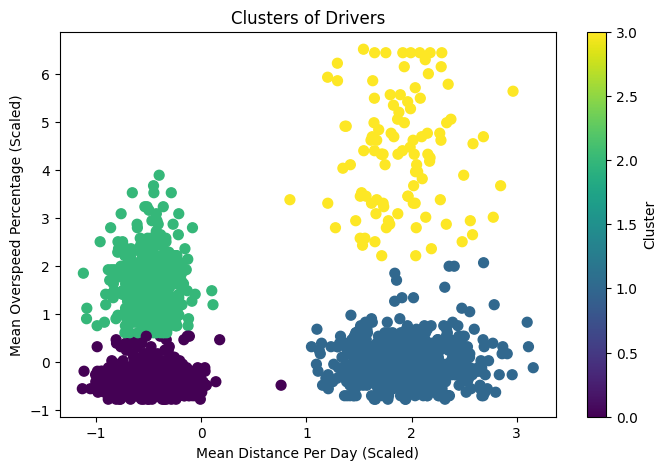

In [18]:
# Step 7: Visualize the Clusters
# Plot the clusters in a 2D space using the two features
plt.figure(figsize=(8, 5))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Clusters of Drivers')
plt.xlabel('Mean Distance Per Day (Scaled)')
plt.ylabel('Mean Overspeed Percentage (Scaled)')
plt.colorbar(label='Cluster')
plt.show()